In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 14)

In [ ]:
df.mean()

id             49972.419900
age            19468.865814
gender             1.349843
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        0.251643
gluc               0.150300
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
overweight         0.622086
dtype: float64

#Add one column "overweight" and calculate the overweight. ( using formula *italicized text*)

In [ ]:
df["overweight"] = (df["weight"] / ((df["height"] / 100) ** 2) > 25 ).astype(int)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
print(df["cholesterol"].unique())   # real-value numeric attribute 
print(df["gluc"].unique())

[1 3 2]
[1 2 3]


In [ ]:
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)

df.head(3)   # after Normalization the real-value attribute rescaled into 0 & 1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


#Draw Categorical Plot

In [ ]:
df_cat = pd.melt(df, id_vars= ["cardio"], value_vars = ["active","alco", "cholesterol", "gluc", "overweight", "smoke"])  # Coverting the data into long format

df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


# Draw the catplot with 'sns.catplot()'

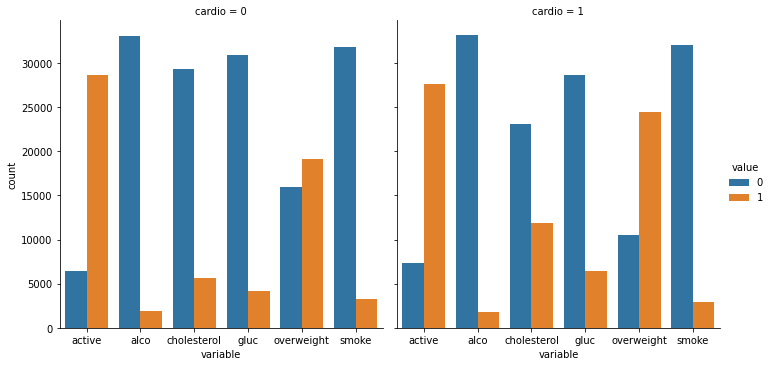

In [ ]:
sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio" )

# **Clean the data**

In [ ]:
df = df[df["ap_lo"] <= df["ap_hi"]]

In [ ]:
df = df[df["height"] >= df["height"].quantile(0.025)]
df = df[df["height"] <= df["height"].quantile(0.975)]

In [ ]:
df = df[df["weight"] >= df["weight"].quantile(0.025)]
df = df[df["weight"] <= df["weight"].quantile(0.975)]

In [ ]:
df  # cleaned dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


# Calculate the correlation matrix

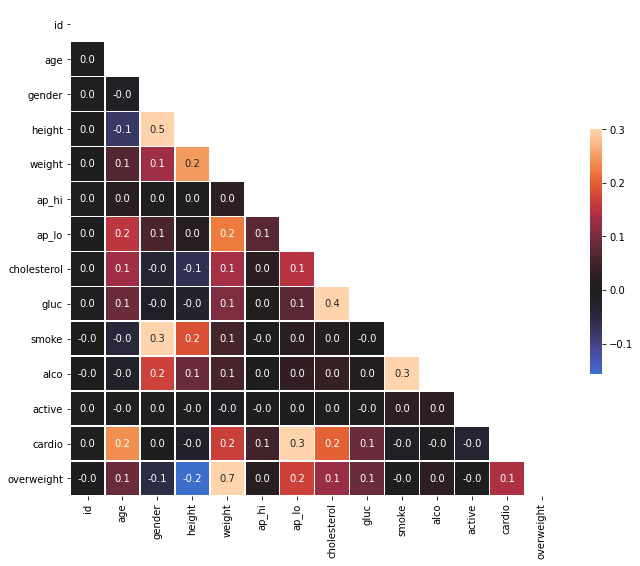

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")


# **Finished the Mediacal Data visulaizer and really it was amazed, thanks to freecodecamp**